<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning-Classification/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>

## <b>Data Description </b>
### <b>Demographic:</b>
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient

### <b>Behavioral:</b>
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ###  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

### <b>Medical( history):</b>
* ###  BP Meds: whether or not the patient was on blood pressure medication 
* ###  Prevalent Stroke: whether or not the patient had previously had a stroke 
* ###  Prevalent Hyp: whether or not the patient was hypertensive
* ###  Diabetes: whether or not the patient had diabetes 

### <b>Medical( current):</b>
* ###  Tot Chol: total cholesterol level 
* ###  Sys BP: systolic blood pressure 
* ###  Dia BP: diastolic blood pressure
* ###  BMI: Body Mass Index
* ###  Heart Rate: heart rate
* ###  Glucose: glucose level

### <b>Predict variable (desired target):</b>
* ###  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [84]:
# Importing the pre-requisite libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise

pd.set_option('max_columns',None)  # Code to make sure pandas shows me all the columns.

In [85]:
# Importing the dataset.

cardio_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction - Challa Shourya Chandra Sai./data_cardiovascular_risk.csv')

In [86]:
# Inspecting the dataset.

cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [87]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [88]:
# Checking out the datatype of all the columns.

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [89]:
# Understanding the basic stats.

cardio_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


## **Defining The Problem Statement.**

*Understanding the difference between numeric[continuous variables and discrete variables] & categorical variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Discrete variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

**Categorical variables** - These are those variables whose values are of string datatype or binary in nature and they assume distinct set of values.

*Why Choose Classification to model the data?*

Classification is used to model the data because we want to predict the **dependent variable(y)** which is categorical in nature.

*Segregating the variables into **dependent & independent** variables[categorical or continous/Discrite.].*

Dependent Variable(Y): TenYearCHD is categorical in nature with 2 classes 0 & 1.

Independent Variables(X's):

* Sex = It is categorical in nature with 2 classes Male & Female.

* Age = It is continuous in nature.

* Education = It is categorical in nature with 4 classes 1, 2, 3, & 4. 

* is_smoking = It is categorical in nature with 2 classes 1 & 0.

* Cigs Per Day: It is continuous in nature as one can consume any number of cigs.

* BP Meds: It is categorical in nature with 2 classes 1 & 0.

* Prevalent Stroke: It is categorical in nature with 2 classes 1 & 0.

* Prevalent Hyp: It is categorical in nature with 2 classes 1 & 0.

* Diabetes: It is categorical in nature with 2 classes 1 & 0.

* Tot Chol: It is continuous in nature.

* Sys BP: It is continuous in nature.

* Dia BP: It is continuous in nature.

* BMI: It is continuous in nature.

* Heart Rate: It is continuous in nature.

* Glucose: It is continuous in nature.

## **Data Preprocessing**

In this section, I will be treating the null values, outliers, and dublicated rows.

In [90]:
# Checking for dublicate rows.

duplicate_check = cardio_df[cardio_df.duplicated()]
print(f'The number of dublicate rows are {len(duplicate_check)}')

The number of dublicate rows are 0


In [91]:
# Checking the missing values and their percentage of missing values.

missing = cardio_df.columns[cardio_df.isnull().any()].tolist()
print('Missing Data Count')
print(cardio_df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(cardio_df[missing].isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Dealing with null values of continuous columns[glucose, totChol, cigsperday, BMI, heartrate] = I will replace the null values for these columns with there respective median because these columns have outliers. As we all know that mean is sensitive to outliers.

Dealing with null values of categorical columns[education, BPMeds] = I will replace the null values with mode.

In [92]:
# Inputing the missing values of continuous columns.

conti_missing_values_columns = ['glucose','totChol','cigsPerDay','BMI','heartRate']

for col in conti_missing_values_columns:
  cardio_df[col].fillna(cardio_df[col].median(), inplace = True)

In [93]:
# Imputing the missing values of categorical columns.

cardio_df = cardio_df.fillna(cardio_df['education'].value_counts().index[0])
cardio_df = cardio_df.fillna(cardio_df['BPMeds'].value_counts().index[0])

In [94]:
# Checking out if we have imputed all the null values.

cardio_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [95]:
# Dropping the id column from the dataset.

cardio_df.drop('id', axis = 1, inplace = True)

In [96]:
# Converting the data type of categorical variables into category and also dividing the columns into categorical and numeric.

cat_var = ['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','education','TenYearCHD']
for cat in cat_var:
   cardio_df[cat] = cardio_df[cat].astype('category')

In [97]:
num_var = cardio_df.describe(exclude = 'category').columns
num_var

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

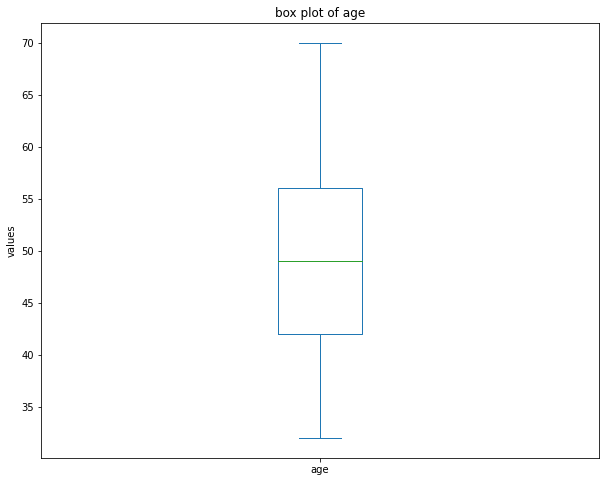

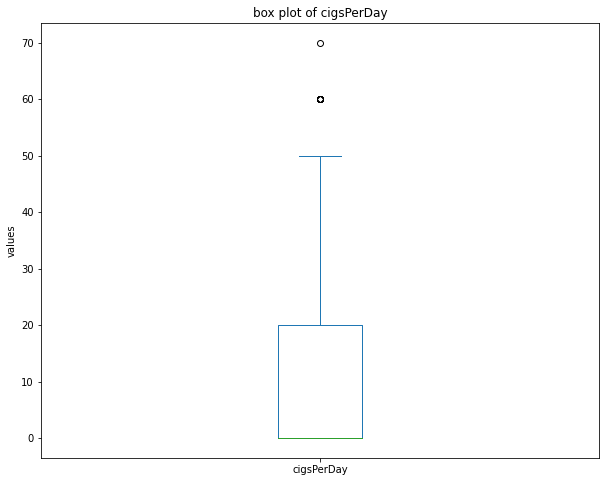

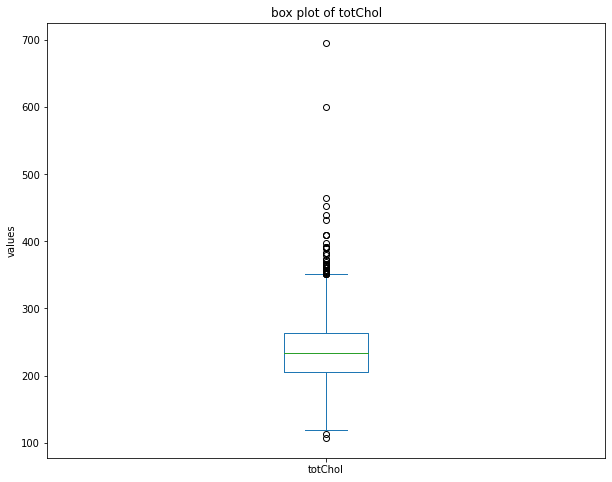

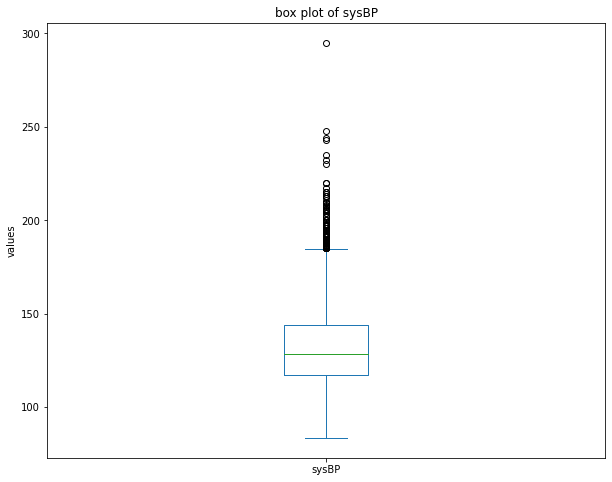

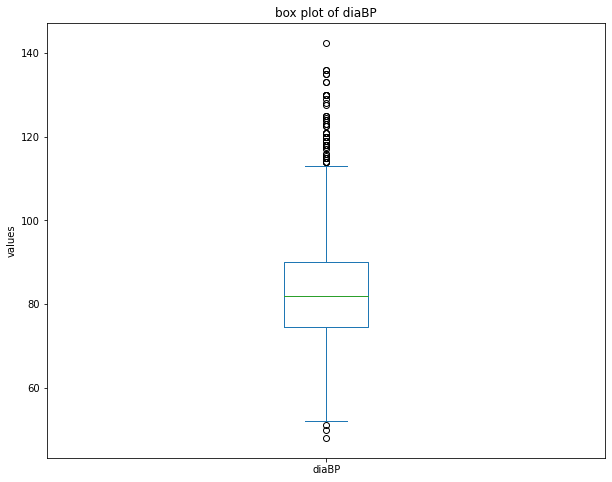

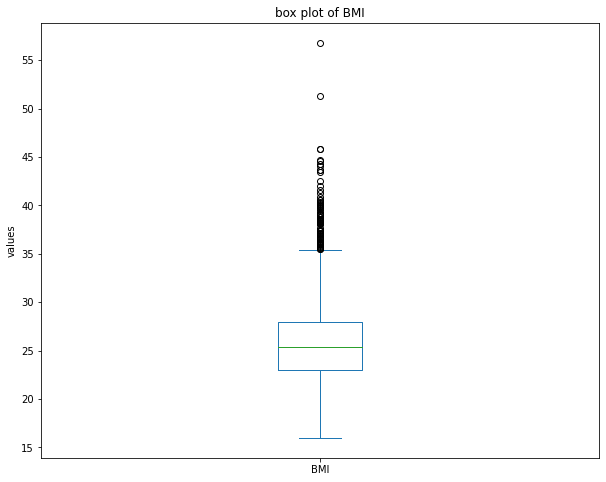

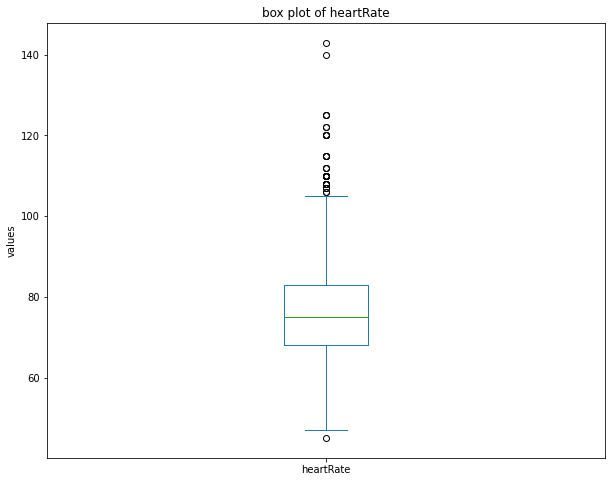

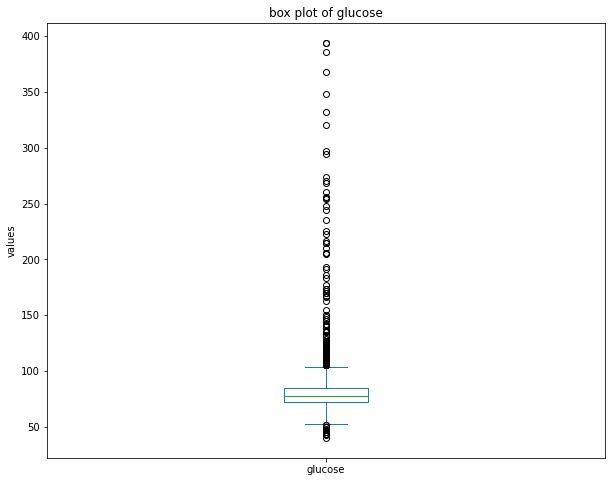

In [98]:
# Visualizing the outliers using boxplots.

for col in num_var:
  plt.figure(figsize = (10,8))
  plt.gca()
  cardio_df[col].plot(kind = 'box')
  plt.ylabel('values')
  plt.title(f'box plot of {col}')

From the box plots we can see that all columns except age have outliers. We will be removing these outliers now.

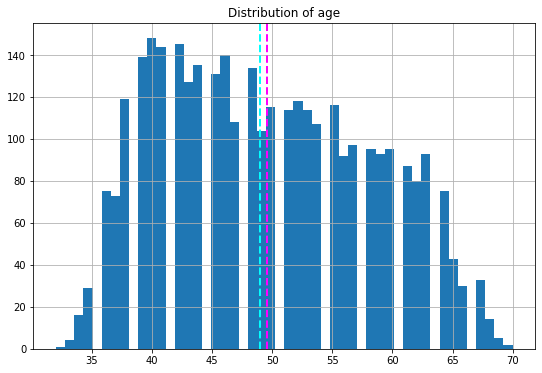

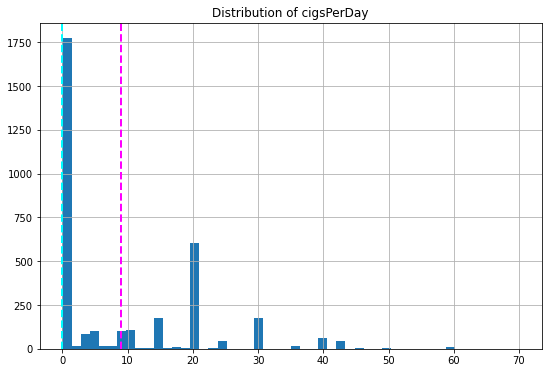

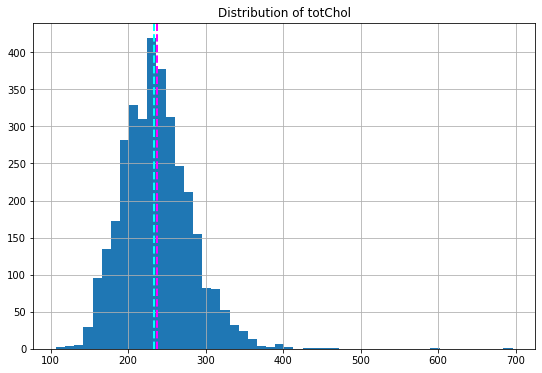

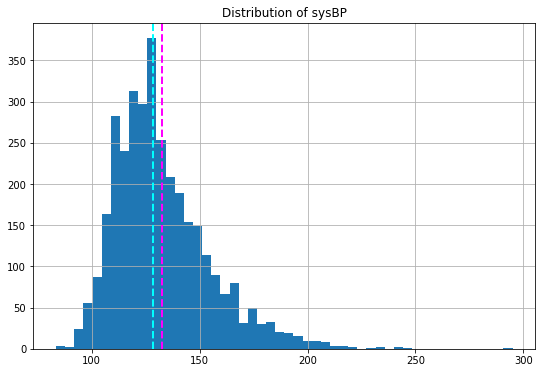

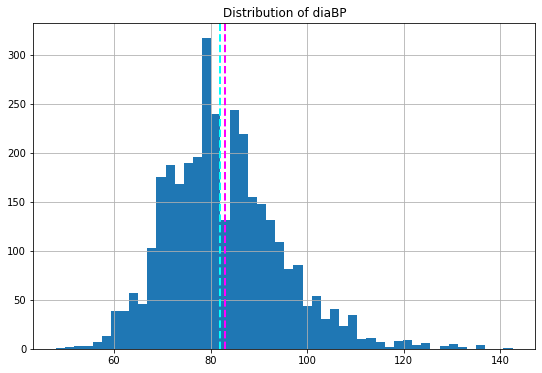

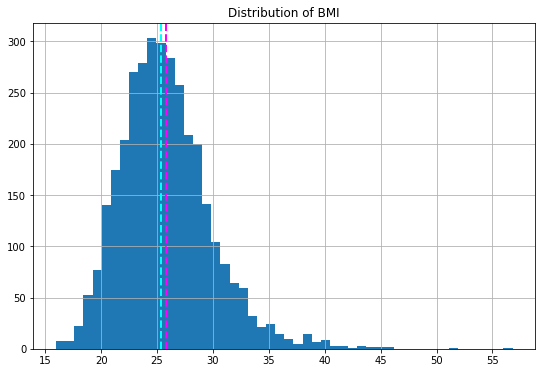

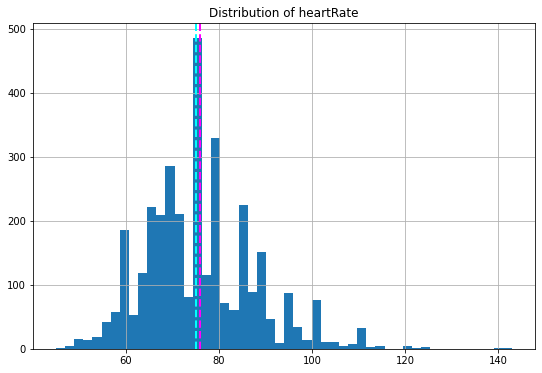

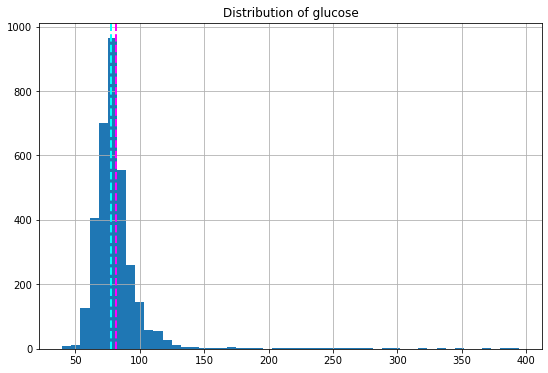

In [99]:
# Visualizing the distribution of the columns that have outliers.

for col in num_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cardio_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of '+ col)
plt.show()

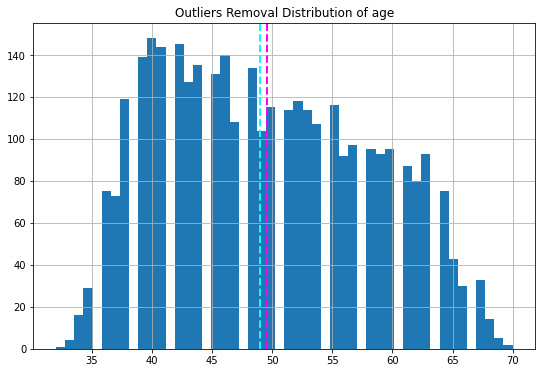

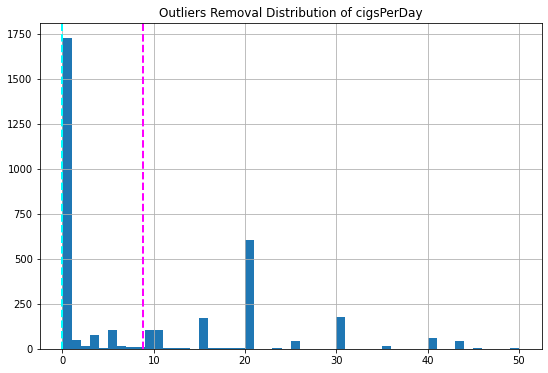

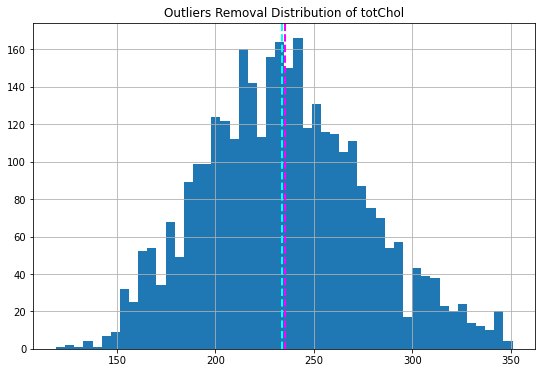

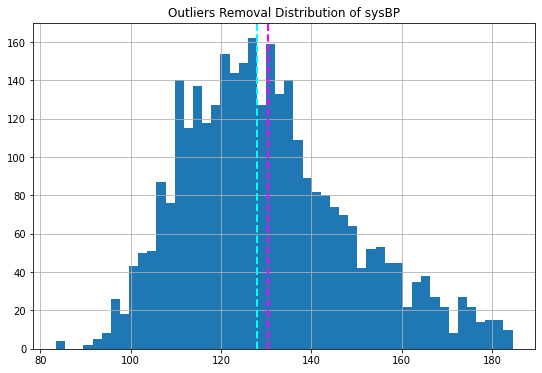

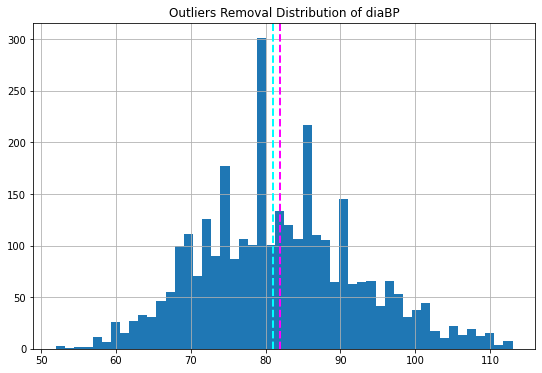

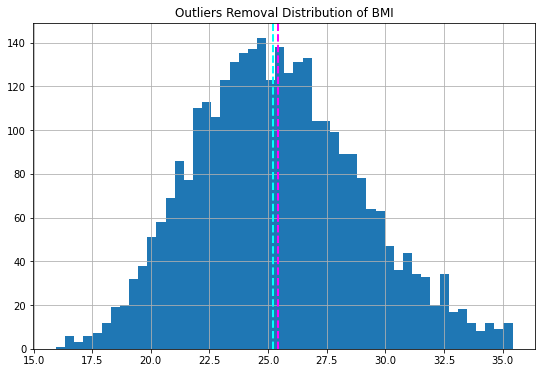

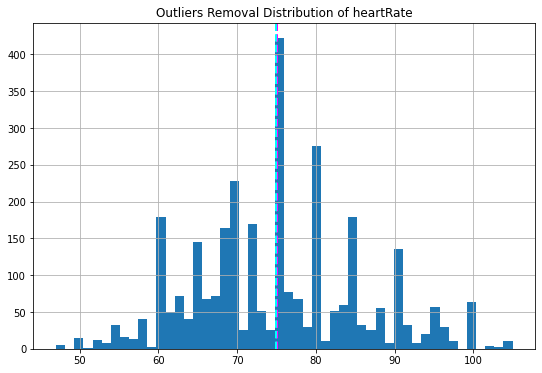

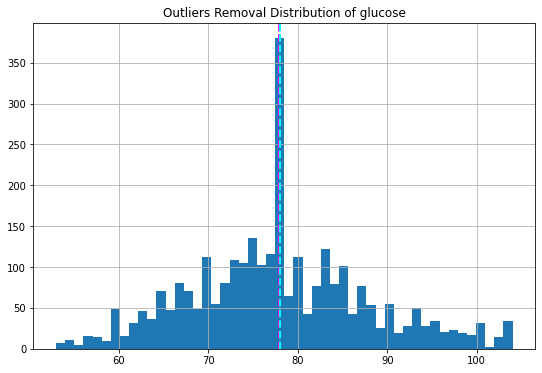

In [100]:
# Removing the outliers from these columns.
no_outliers_df = cardio_df.copy()   # Creating a copy of the dataset because there are models like random_forrest and KNN that are robust to outliers.

for col in num_var:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()

  Q1 = np.percentile(cardio_df[col],25)
  Q3 = np.percentile(cardio_df[col],75)
  IQR = Q3 - Q1
  Lower_outliers = Q1 - 1.5*IQR
  Upper_outliers = Q3 + 1.5*IQR     # Calculating the lower outliers and upperoutliers

  no_outliers_df = no_outliers_df[(no_outliers_df[col] >= Lower_outliers) & (no_outliers_df[col] <= Upper_outliers)]
  feature = no_outliers_df[col]            # Subsetting the data without any outliers in an iterative way.

  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()

As you can see from the above distributions after removing the outliers they have become approximately normally distributed.

## **EDA**

Under EDA, I will be performing univariante analysis, and bivarinate analysis.

Univariante analysis = Helps us understand the distribution of a particular column. The most common way to understand the distribution is to plot a histogram.

Multivarinate analysis = Helps us understand the relationship between the dependent variable and independent variables.

###Uni-varinate Analysis

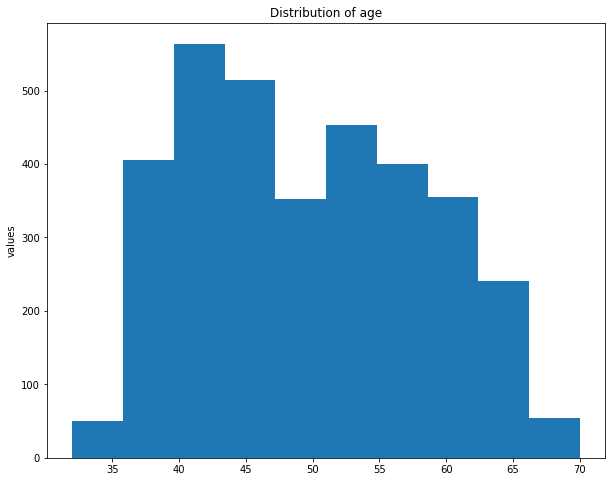

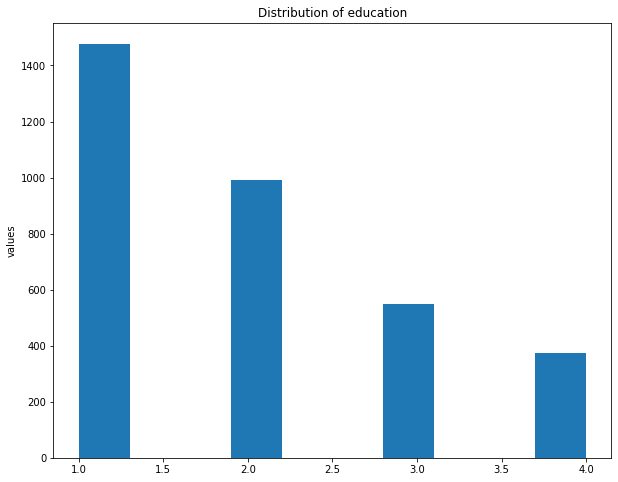

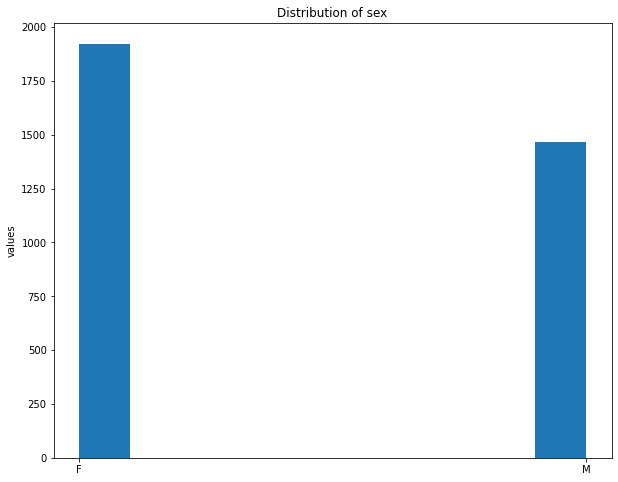

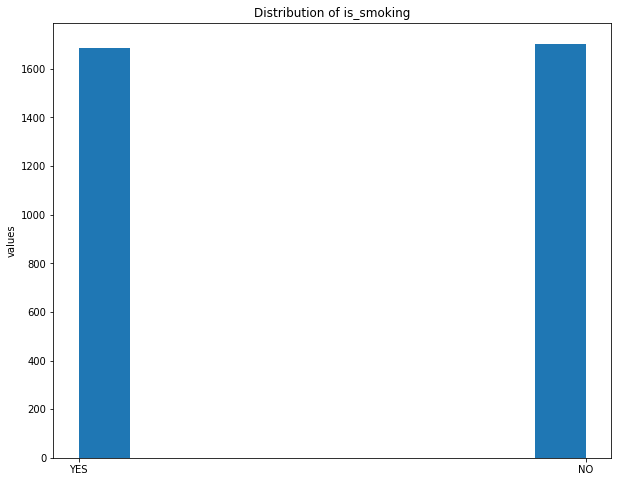

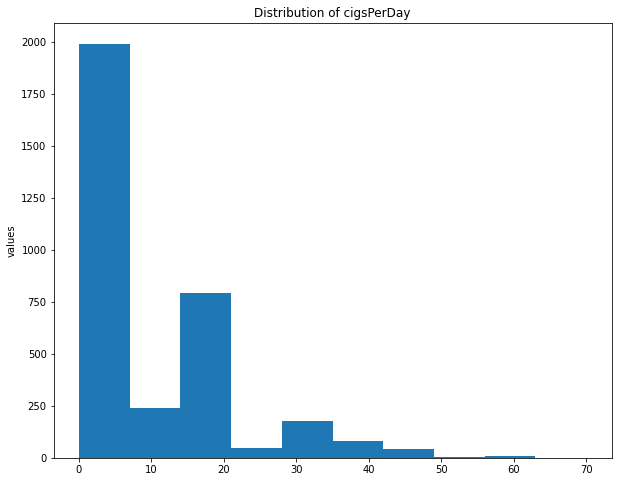

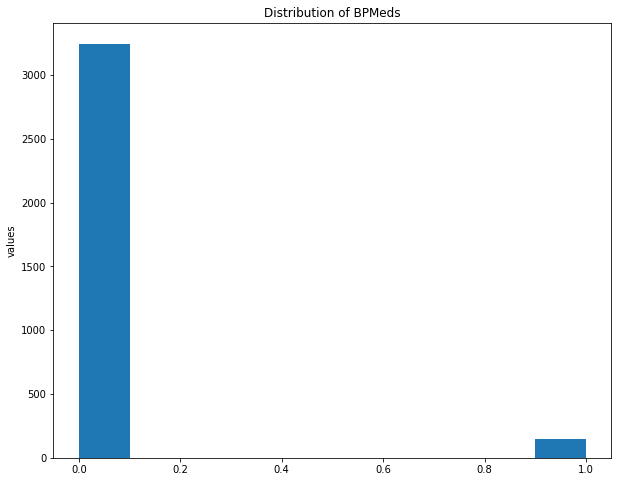

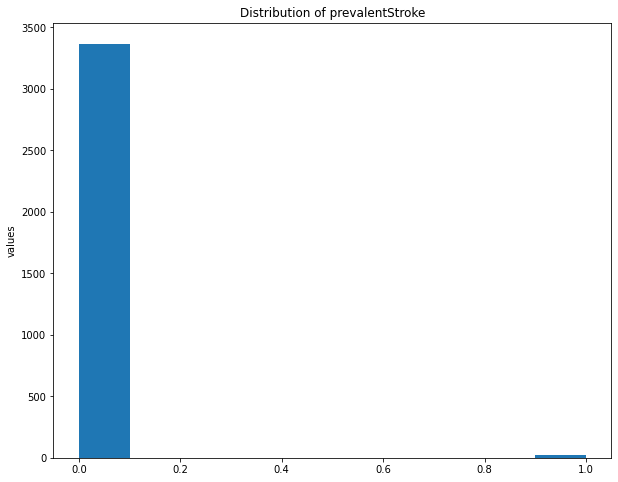

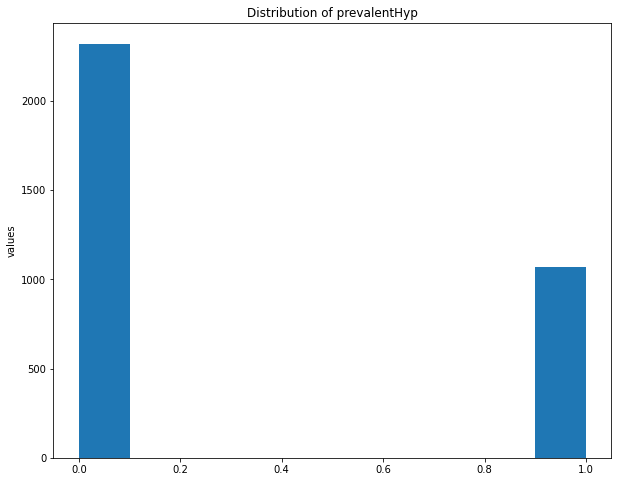

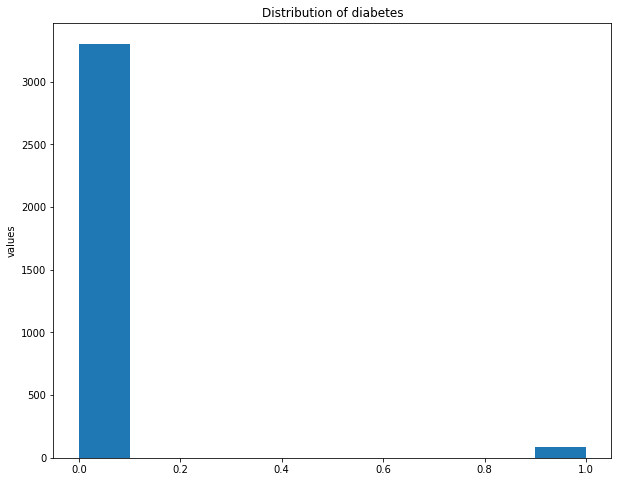

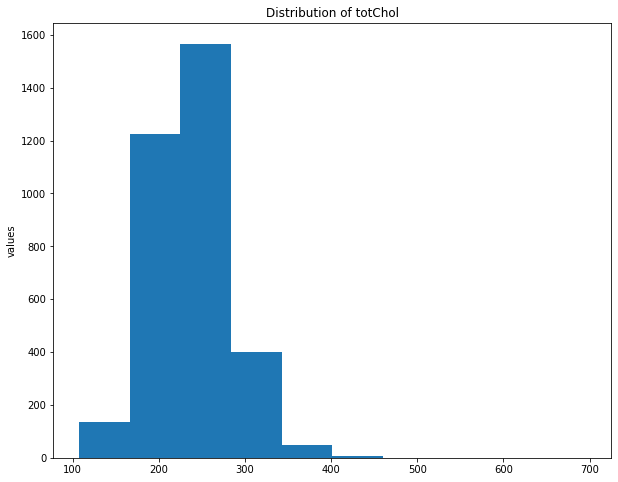

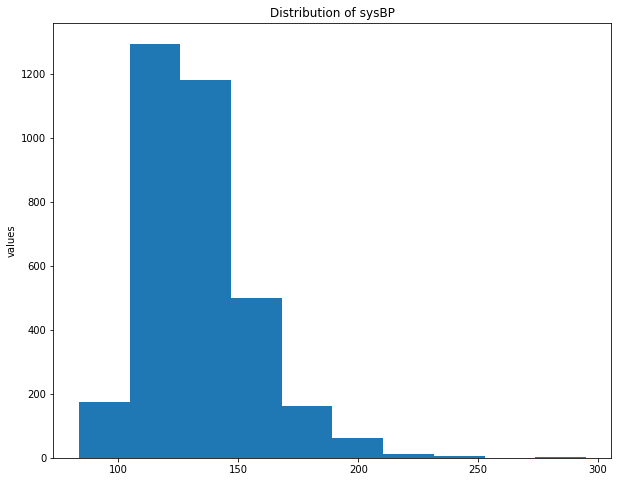

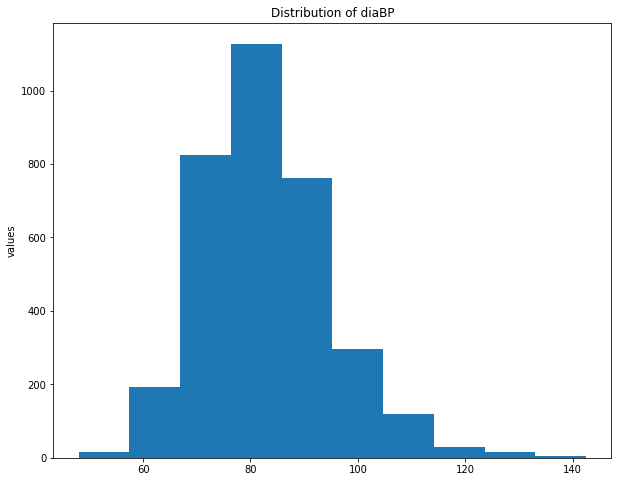

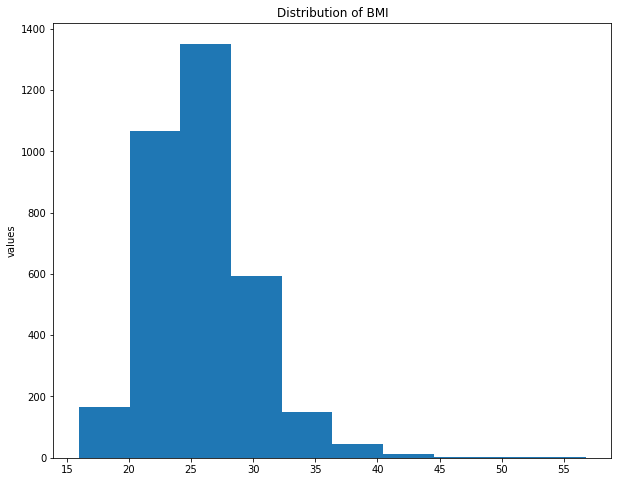

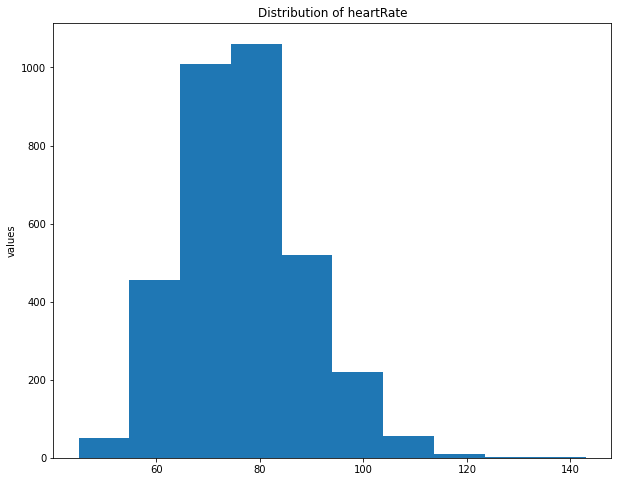

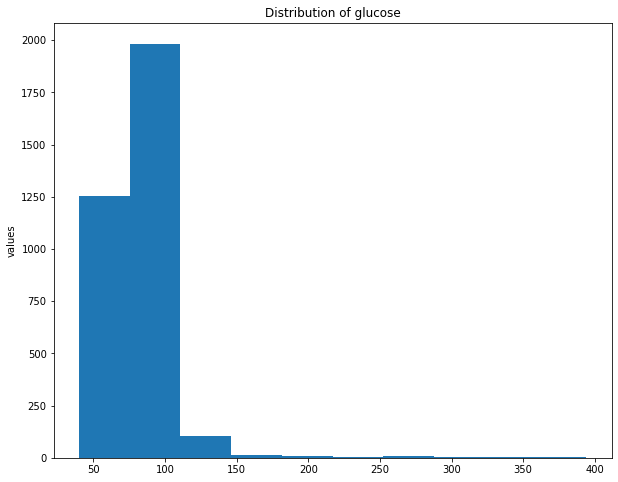

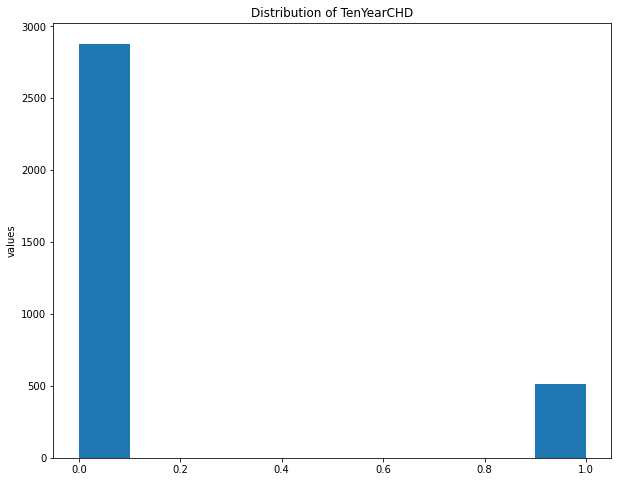

In [114]:
# Uni-varinate analysis through histogram.

for col in no_outliers_df.columns:
  plt.figure(figsize = (10,8))
  plt.hist(cardio_df[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')

### Bi-variante Analysis.

**Hypothesis:** Those people who smoke a lot of cigarettes they are more prone to TenYearCHD.

Text(0.5, 1.0, 'box plot of TenYearCHD & Cigsperday')

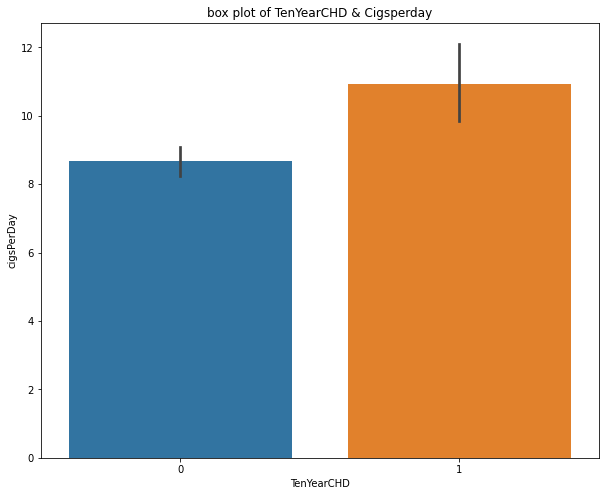

In [133]:
# Understanding the relationship between target variable and cigsperday.
plt.figure(figsize = (10,8))
sns.barplot(y = cardio_df['cigsPerDay'], x = cardio_df['TenYearCHD'])
plt.title('box plot of TenYearCHD & Cigsperday')

**Analysis:** Yaay!, My hypothesis is indeed true.
_________________________________________________________

**Hypothesis:** I don't think there would be any sort of relationship between sex and CHD.

Text(0.5, 1.0, 'stripplot of TenYearCHD & sex')

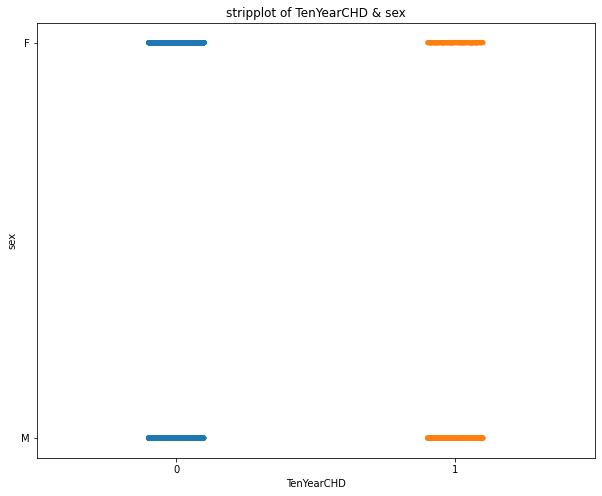

In [134]:
# Understanding the relationship between target variable and sex.
plt.figure(figsize = (10,8))
sns.stripplot(x = cardio_df['TenYearCHD'], y = cardio_df['sex'])
plt.title('stripplot of TenYearCHD & sex')

**Analysis:** My hypothesis is correct, I don't find any relationship between sex and CHD. A male or a female can be suffering from CHD.

__________________________________________________________________

**Hypothesis:** The ideal BMI is between 18.5 and 24.9. So any person above 24.9 is more prone to CHD.

Text(0.5, 1.0, 'lineplot of TenYearCHD & BMI')

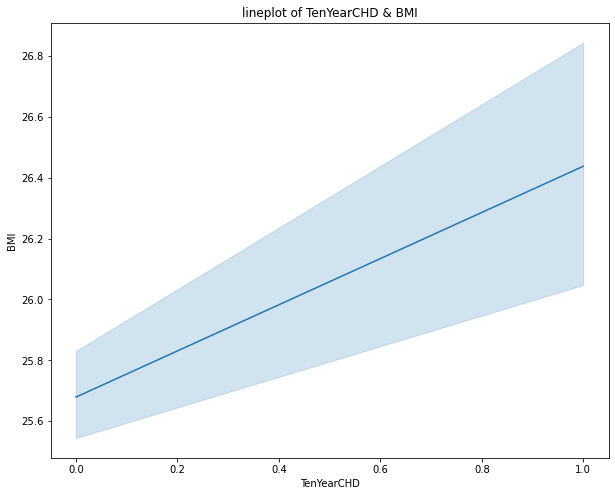

In [135]:
# Understanding the relationship between target variable and BMI.
plt.figure(figsize = (10,8))
sns.lineplot(x = cardio_df['TenYearCHD'], y = cardio_df['BMI'])
plt.title('lineplot of TenYearCHD & BMI')

**Analysis:** As you can see there is the positive relationship between CHD and BMI. The higher the BMI, more prone to CHD and vice-versa.
___________________________________________________________________

**Hypothesis:** I think those how have high glucose may suffer from CHD.

Text(0.5, 1.0, 'boxplot of TenYearCHD & glucose')

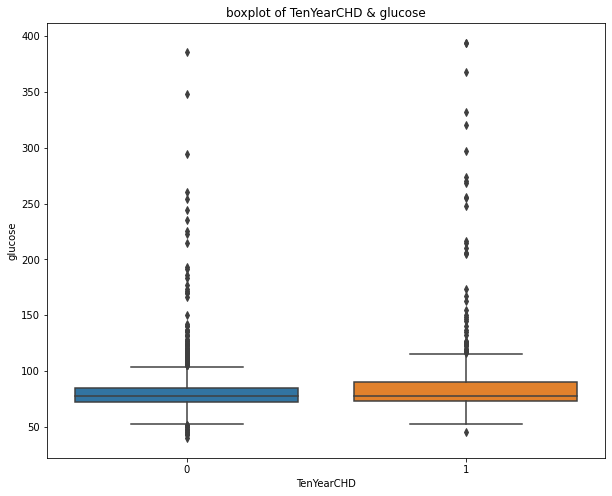

In [136]:
# Understanding the relationship between target variable and glucose.

plt.figure(figsize = (10,8))
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['glucose'], data = cardio_df)
plt.title('boxplot of TenYearCHD & glucose')

**Analysis:** The relationship is not that explicit. But we can see that the median glucose level of CHD patients is higher than those of no CHD patients.